# MSiA 400 - Final Project
## INITITAL EDA: TRNSACT Table
### Team 12: Alejandra Lelo de Larrea Ibarra, Xin Shu, Yi Chen, Yiqing Chen

This file shows our EDA for the SKUINFO & DEPTINFO tables on the original dataset (i.e. before cleaning).

NOTE: To upload the data into Postgress database, we did some cleanning directly on the terminal. See *Clean_SKUINFO_TRNSACT* file for the corresponding code.

In [1]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
# --- Variables on File---

# Connection to db 
#USER = "YOUR USER HERE"
#PSWD = "YOUR PASSWORD HERE"
USER = "ali8110"
PSWD = "A15170228.l1"
HOST = "pg.analytics.northwestern.edu"
PORT = "5432"
DB_NAME = "2022-everything-team12"

### Connect to database

In [3]:
# Connect to postgress database
try:
    # Connect to an existing database
    connection = psycopg2.connect(user = USER,
                                  password = PSWD,
                                  host = HOST,
                                  port = PORT,
                                  database = DB_NAME)

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    
    # Fetch result
    record = cursor.fetchone()
    
    # Print succesfull connection
    print("You are connected to - ", record, "\n")
    
except (Exception, Error) as error:
    # Print error conecting to ostgres
    print("Error while connecting to PostgreSQL", error)

You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



In [4]:
# --- Print head of table ---

# Write SQL query
query = """
SELECT *
FROM \"TRNSACT\"
LIMIT 20
"""
# Retrive sample data
pd.read_sql(query, connection)


/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SKU,STORE,REGISTER,TRANNUM,INTID,SALEDATE,STYPE,QUANTITY,AMT,ORIGPRICE,SEQ,MIC,EXTRACOL
0,2386897,3303,230,05500,575500461,2004-10-23,P,1,18.5,18.5,363300081,281,0
1,2386897,3303,230,05500,0,2004-12-20,P,1,18.5,18.5,168500154,281,0
2,2386897,3303,230,05800,0,2004-10-16,P,1,18.5,18.5,902100092,281,0
3,2386897,3303,230,07800,0,2004-10-16,P,1,18.5,18.5,902800092,281,0
4,2386897,3303,230,09600,390805370,2004-10-07,P,1,18.5,18.5,621800049,281,0
5,2386897,3303,230,09600,386004088,2005-02-25,P,1,18.5,18.5,441600230,281,0
6,2386897,3303,230,10300,837600465,2004-10-16,P,1,18.5,18.5,902900092,281,0
7,2386897,3303,240,02600,582600465,2004-10-05,P,1,18.5,18.5,597700048,281,0
8,2386897,3303,250,00800,0,2005-01-16,P,1,18.5,18.5,583600068,281,0
9,2386897,3303,250,01800,0,2005-05-26,P,1,18.5,18.5,280500025,281,0


In [5]:
# --- Check data types ---
#df.info()

# write SQL query
query = """
SELECT column_name, data_type 
FROM information_schema.columns
WHERE table_name = 'TRNSACT'
"""
# Call SQL to get data types
print(pd.read_sql(query, connection));

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   column_name  data_type
0          SKU    integer
1        STORE    integer
2     REGISTER    integer
3      TRANNUM       text
4        INTID    integer
5     SALEDATE       date
6        STYPE  character
7     QUANTITY    integer
8          AMT    numeric
9    ORIGPRICE    numeric
10         SEQ    integer
11         MIC       text
12    EXTRACOL    integer


In [6]:
# --- Check number of observations ---

# write SQL query
query = """
SELECT count(*)
FROM \"TRNSACT\"
"""
# Call SQL to get number of rows
print(pd.read_sql(query, connection));

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


       count
0  120916889


### Analyzing TRNSACT table

The trnsact database has 120,916,889 of observations. Thus, to do the EDA on this data we will extract 10,000,000 observations randomly. 

In [7]:
# --- Retrive a sample of the data ---

#Write query
query = """
SELECT *
FROM \"TRNSACT\"
ORDER BY random()
LIMIT 10000000
"""

# Retrive sample data
df = pd.read_sql(query, connection)
df

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SKU,STORE,REGISTER,TRANNUM,INTID,SALEDATE,STYPE,QUANTITY,AMT,ORIGPRICE,SEQ,MIC,EXTRACOL
0,2744822,9209,460,00900,0,2004-10-22,P,1,25.0,12.50,121300040,885,0
1,4169257,9304,310,03400,0,2005-07-08,P,1,18.0,12.06,142600090,943,0
2,7037506,5302,230,04700,0,2005-04-28,P,1,18.0,6.30,363400046,015,0
3,897346,3407,510,01000,0,2004-11-19,R,1,29.0,29.00,192700069,831,0
4,3764038,7507,80,02700,0,2004-08-29,P,1,20.0,9.38,842700105,321,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,6567540,2402,570,01500,186308628,2005-07-08,P,1,55.0,27.50,26600038,358,0
9999996,6318025,107,400,01400,0,2005-07-15,P,1,30.0,0.99,778700059,730,0
9999997,3677208,1203,370,00700,0,2005-06-17,R,1,22.0,22.00,215800033,126,0
9999998,5503775,2907,520,02300,615008706,2005-02-24,P,1,69.5,8.68,423200048,205,0


In [8]:
# Close connection to db
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


PostgreSQL connection is closed


In [9]:
# Check percentage of missing values per column
df.isnull().sum()/df.shape[0]*100

SKU          0.0
STORE        0.0
REGISTER     0.0
TRANNUM      0.0
INTID        0.0
SALEDATE     0.0
STYPE        0.0
QUANTITY     0.0
AMT          0.0
ORIGPRICE    0.0
SEQ          0.0
MIC          0.0
EXTRACOL     0.0
dtype: float64

There are no missing values in the TRNSACT table. 

In [10]:
# Summary statistics of numeric variables
df.describe()

,SKU,STORE,REGISTER,INTID,QUANTITY,AMT,ORIGPRICE,SEQ,EXTRACOL
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,4.974298e+06,4.440911e+03,4.005861e+02,1.902526e+08,1.0,3.677305e+01,2.461832e+01,4.993516e+08,2.113680e-02
std,2.837378e+06,2.846871e+03,2.531170e+02,3.007742e+08,0.0,4.025786e+01,2.714558e+01,2.884803e+08,1.438403e-01
min,3.000000e+00,1.020000e+02,1.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
25%,2.628607e+06,2.103000e+03,1.900000e+02,0.000000e+00,1.0,1.600000e+01,9.930000e+00,2.494002e+08,0.000000e+00
50%,4.859926e+06,4.103000e+03,3.700000e+02,0.000000e+00,1.0,2.800000e+01,1.800000e+01,4.988001e+08,0.000000e+00
75%,7.396664e+06,7.102000e+03,5.800000e+02,3.425091e+08,1.0,4.800000e+01,3.100000e+01,7.493001e+08,0.000000e+00
max,9.999974e+06,9.909000e+03,9.930000e+02,9.999100e+08,1.0,1.422000e+03,1.200000e+03,9.999004e+08,1.000000e+00


SKU, STORE, REGISTER, TRANNUM, SALEDATE AND SEQ form a composite key for the table. Variables REGISTER, TRANNUM, SEQ, INTERID and MIC are a series of codes or id internally used by Dillard's which might have no usefull meaning. Additionally, as in the other tables, the extra column only contains zeros and ones. Without more information, we consdier these irrelevant variables that should not be taken into account individually.


From the above outputs we can see that all transactions have one quantity (confirmed with complete dataset in postgress). Addtionally, we see that ORIGPRICE (the original price of the item) and AMT (total amoun of the transaction charged) are sometimes equal and others ORIGPRICE seems to be greater than AMT, which is suspicious. It might be the case that the columns are wrongly labeld. 

Lets plot a correlation matrix for the numerical variables. 

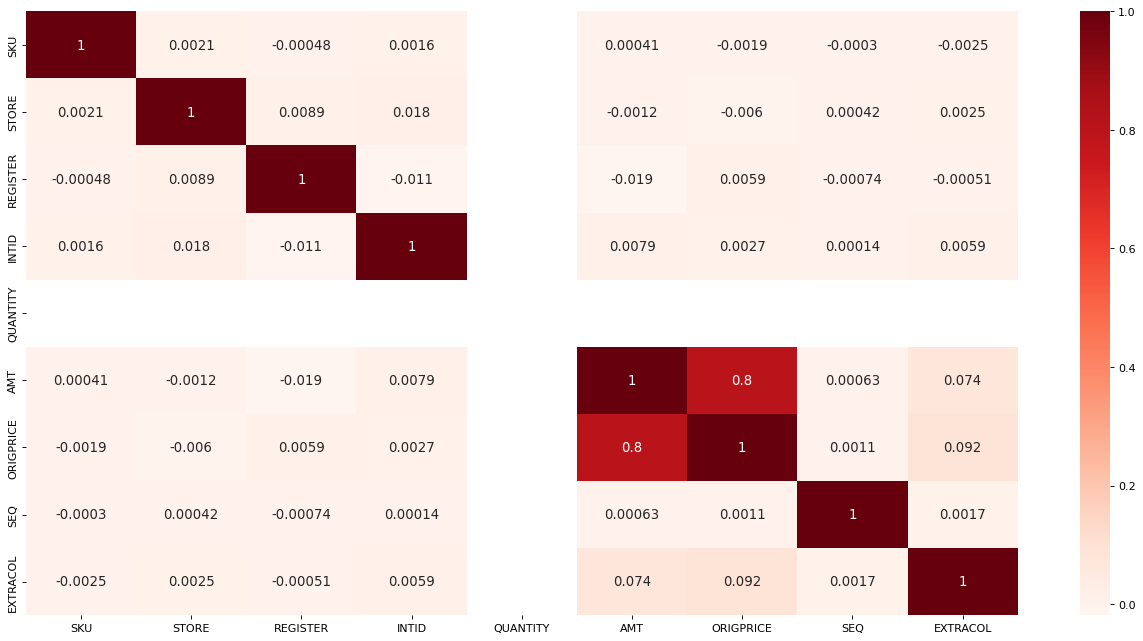

In [11]:
# Correlation matrix
plt.figure(figsize = (20, 10), dpi = 80)
sns.heatmap(df.corr(), annot=True, cmap = 'Reds', 
            annot_kws={"fontsize":12})
plt.show()

#### SKU

In [12]:
# Number of SKU in sample 
print("Number of different SKU's in sample: " + str(len(df.SKU.unique())))

Number of different SKU's in sample: 536884


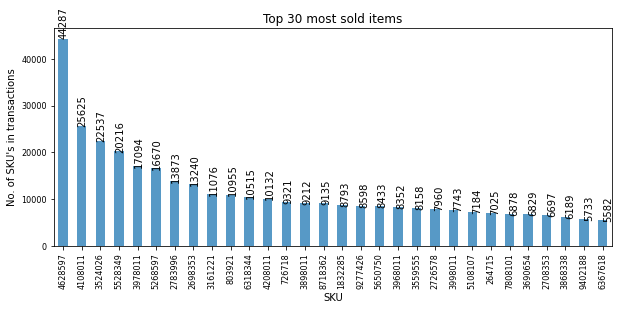

In [13]:
# Count for SKU
SKU_count = df.SKU.value_counts().head(30)

# Bar plot 
ax = SKU_count.plot(kind = 'bar', rot = 90, fontsize = 8, 
                             alpha = 0.75, figsize = (10,4))

# Customize plot
plt.title("Top 30 most sold items")
plt.xlabel("SKU")
plt.ylabel("No. of SKU's in transactions")

# Add counts on top of bars

for i in ax.patches:
    ax.annotate(str(i.get_height()), 
               (i.get_x()*1.01, i.get_height()*1.01),
               rotation = 90)

# print plot
plt.show()

We can see that the most sold item is the one with SKU "4628597". If we had an SKU catalogue we could get an idea of which type of products are the best sellers for Dillards. 

#### STORE

In [14]:
# Number of stores in sample 
print("Number of different stores in sample: " + str(len(df.STORE.unique())))

Number of different stores in sample: 330


We have a total of 453 stores in the STRINFO table, thus our sample of transactions does not include all the possible stores. 

In [15]:
# Add purchase and return columns instead of STYPE variable
df["PURCHASE"] = np.where(df["STYPE"]== "P", 1, 0)
df["RETURN"] = np.where(df["STYPE"]== "R", 1, 0)

# define funtion to get median 
def getMedian(x):
    return np.percentile(x, 50)

def countUnique(x):
    return len(x.unique())

# Aggregate data by strore 
df_store = pd.pivot_table(df,
                          values = ['SKU','TRANNUM', 'PURCHASE', "RETURN", "QUANTITY", "ORIGPRICE", "AMT"],
                          index = ['STORE'], 
                          aggfunc = {'SKU':'count',
                                     'TRANNUM': countUnique, 
                                     'PURCHASE': 'sum',
                                     'RETURN': 'sum',
                                     'QUANTITY': 'sum',
                                     'ORIGPRICE':[np.mean, getMedian, 'std'],
                                     'AMT':[np.mean, getMedian, 'std']})

# print header and tail
df_store

AMT                       ORIGPRICE                        \
      getMedian       mean        std getMedian       mean        std   
STORE                                                                   
102       33.00  43.336819  49.665648     20.00  29.816002  34.582952   
103       30.00  42.387152  51.150364     18.50  26.550491  32.594237   
107       29.00  39.068525  44.286150     19.75  26.865960  30.101758   
202       29.00  36.342867  38.416687     17.50  22.904966  23.107279   
203       29.50  40.096951  46.757315     17.69  24.997297  29.642869   
...         ...        ...        ...       ...        ...        ...   
9704      21.99  30.555703  29.305775     16.00  21.074382  20.413348   
9709      24.00  31.275887  28.426129     15.22  20.468867  19.892899   
9804      25.00  33.977563  37.386023     18.00  24.181140  25.300735   
9806      25.00  35.260281  39.015522     21.00  30.786277  32.887551   
9909      24.00  32.243643  37.589305     15.00  20.777369  24.260576   

      PURCHASE QUANTITY RETURN    SKU     TRANNUM  
           sum      sum    sum  count countUnique  
STORE                                              
102      42146    45492   3346  45492         346  
103      37109    40651   3542  40651         362  
107      55923    60932   5009  60932         563  
202      23926    26155   2229  26155         268  
203      34233    37973   3740  37973         378  
...        ...      ...    ...    ...         ...  
9704     13730    14691    961  14691         214  
9709     19653    21032   1379  21032         222  
9804     19117    20703   1586  20703         228  
9806     46750    48828   2078  48828         999  
9909     18283    19367   1084  19367         186  

[330 rows x 11 columns]

In [16]:
df_store.describe()

AMT                           ORIGPRICE                          \
        getMedian        mean         std   getMedian        mean         std   
count  330.000000  330.000000  329.000000  330.000000  330.000000  329.000000   
mean    27.407818   36.030159   38.575627   17.589742   23.868401   25.802093   
std      2.869464    3.401780    5.688683    1.764949    2.536738    3.692137   
min      0.000000    0.000000   23.346848    6.300000   11.487662   16.032621   
25%     25.250000   34.296366   35.650482   16.780000   22.352375   23.363768   
50%     28.000000   36.338684   38.580977   17.595000   23.786077   25.934412   
75%     29.000000   38.038697   41.636714   18.687500   25.558735   27.703298   
max     34.000000   43.456481   57.880539   21.000000   30.786277   37.337929   

           PURCHASE      QUANTITY       RETURN           SKU     TRANNUM  
                sum           sum          sum         count countUnique  
count    330.000000    330.000000   330.000000    330.000000  330.000000  
mean   27974.360606  30303.030303  2328.669697  30303.030303  277.084848  
std    11951.743611  12997.155589  1094.579350  12997.155589   92.159133  
min        1.000000      1.000000     0.000000      1.000000    1.000000  
25%    19264.250000  20836.750000  1576.250000  20836.750000  214.250000  
50%    25194.500000  27308.500000  2125.500000  27308.500000  262.500000  
75%    35188.000000  38029.750000  2947.500000  38029.750000  316.000000  
max    71339.000000  78046.000000  6707.000000  78046.000000  999.000000

On average, each store has 277 transactions; 30,303 different products (SKU);  27,978 purchases; 2,324 returns. The average mean original price of the items in each store is 36.04 dollarse with a standard deviation of 38.65. Additionally, the average mean amount per transaction is 23.84 dollars.

#### SALEDATE

In [17]:
dates=np.sort(df["SALEDATE"].unique())
print("Initial date in sample: " + str(min(dates)))
print("Final date in sample: " + str(max(dates)))

Initial date in sample: 2004-08-01
Final date in sample: 2005-08-27


In [18]:
# define funtion to get median 
def getMedian(x):
    return np.percentile(x, 50)

def countUnique(x):
    return len(x.unique())

# Aggregate data by strore 
df_date = pd.pivot_table(df,
                          values = ['SKU','TRANNUM', 'PURCHASE', "RETURN", "QUANTITY", "ORIGPRICE", "AMT"],
                          index = ['SALEDATE'], 
                          aggfunc = {'SKU':countUnique,
                                     'TRANNUM': countUnique, 
                                     'PURCHASE': 'sum',
                                     'RETURN': 'sum',
                                     'QUANTITY': 'sum',
                                     'ORIGPRICE': 'sum'}).reset_index()

# print header and tail
df_date

,SALEDATE,ORIGPRICE,PURCHASE,QUANTITY,RETURN,SKU,TRANNUM
0,2004-08-01,405654.71,15476,16834,1358,12364,150
1,2004-08-02,384409.33,14416,16101,1685,11759,312
2,2004-08-03,444133.16,17586,19076,1490,12561,330
3,2004-08-04,452174.59,18097,19585,1488,13415,339
4,2004-08-05,497842.62,18608,20116,1508,14039,311
...,...,...,...,...,...,...,...
384,2005-08-23,485972.04,17903,19863,1960,14555,366
385,2005-08-24,774186.49,38371,40997,2626,29763,361
386,2005-08-25,713910.22,34770,37460,2690,27602,362
387,2005-08-26,825567.82,39830,42920,3090,31020,351


<AxesSubplot:title={'center':"Number of Different SKU's Sold"}, xlabel='SALEDATE'>

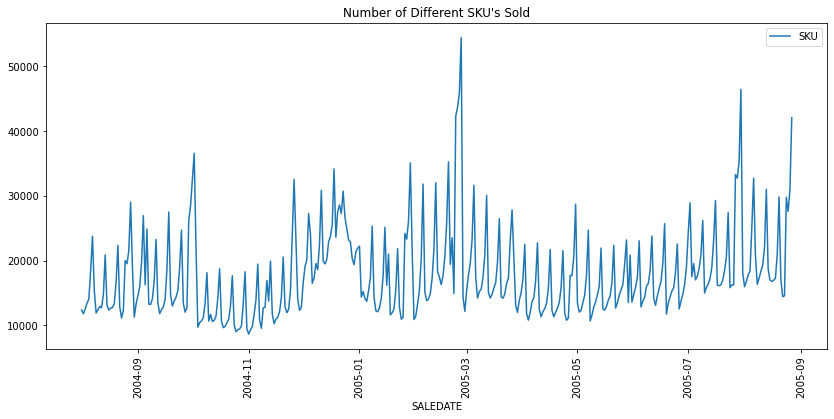

In [19]:
# Time series plot for number of items 
df_date.plot.line(x = "SALEDATE", y = "SKU", figsize = (14,6),
                  title = "Number of Different SKU's Sold", rot = 90)

We can observe some sasonality on the data when taking into account the dates. Since we have daily data, the seasonality may be weekly, biweekly or monthly. 

<AxesSubplot:title={'center':'Number of Products Sold'}, xlabel='SALEDATE'>

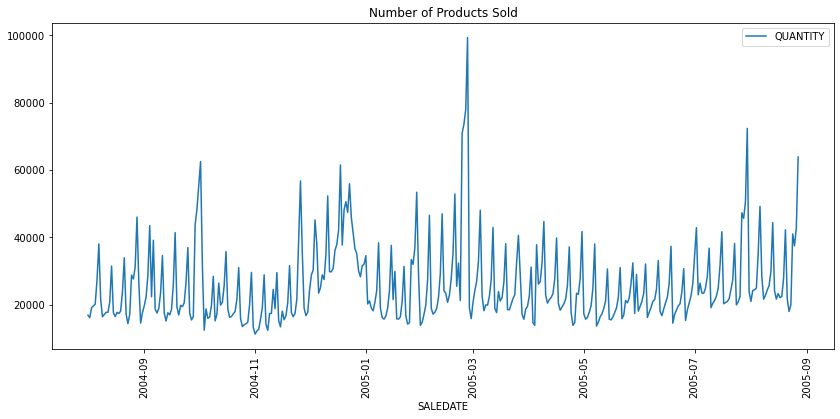

In [20]:
# Time series plot for quantity sold
df_date.plot.line(x = "SALEDATE", y = "QUANTITY", figsize = (14,6),
                  title = "Number of Products Sold", rot = 90)

In [21]:
# Search for maximum value in sales 
print("Maximum of quantities sold was in ", 
      str(df_date.sort_values("QUANTITY", ascending = False).head(1).SALEDATE),
     "which coincides with the \"President Sales day\" in 2005.")

Maximum of quantities sold was in  207    2005-02-26
Name: SALEDATE, dtype: object which coincides with the "President Sales day" in 2005.


Text(0.5, 1.0, 'Type of Transaction')

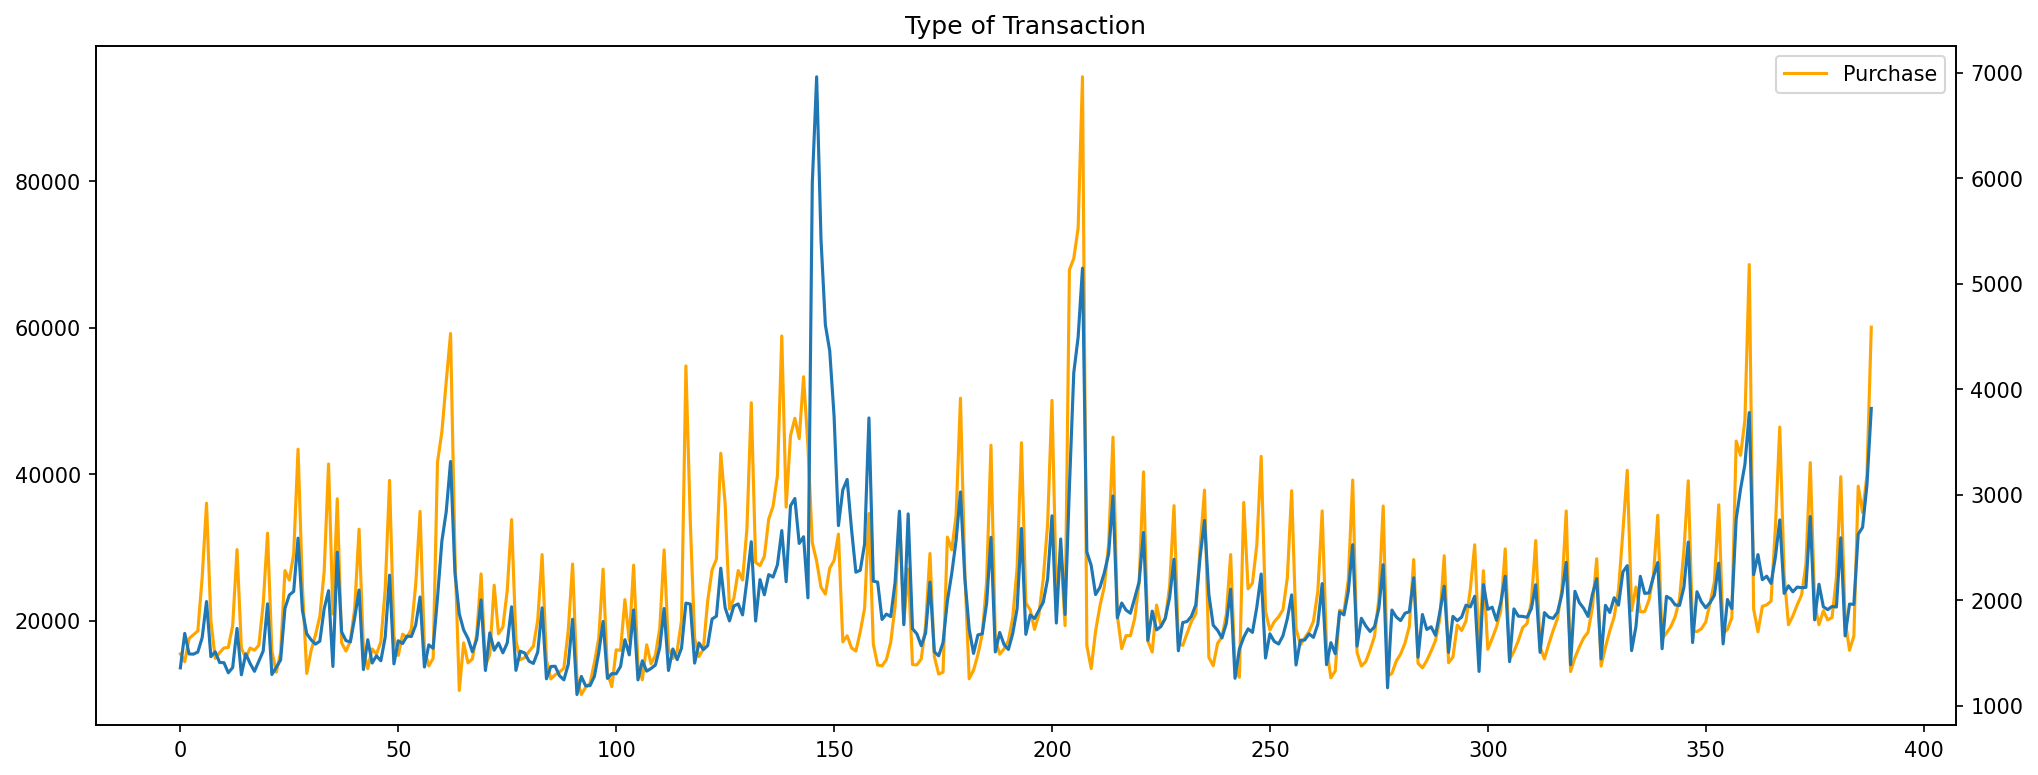

In [22]:
# to set the plot size
plt.figure(figsize=(16, 6), dpi=150)
  
# Plot number of purchases - left axis 
ax = df_date['PURCHASE'].plot.line(label='Purchase', color='orange')
# Add legend
ax.legend()

# Plot number of returns - right axis
df_date['RETURN'].plot.line(label='Return', secondary_y = True, ax = ax)
# Add legend
ax.legend()

# adding title to the plot
plt.title('Type of Transaction')




<AxesSubplot:title={'center':'Total Revenue'}, xlabel='SALEDATE'>

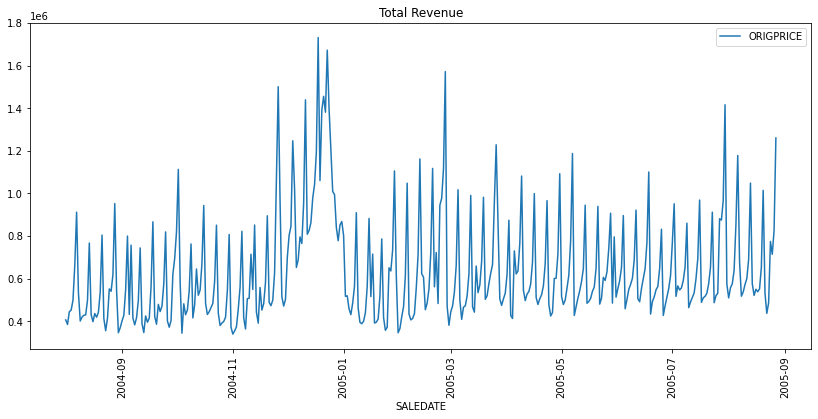

In [23]:
# Time series plot for total revenue (note quantity = 1 thus revenue = origprice)
df_date.plot.line(x = "SALEDATE", y = "ORIGPRICE", figsize = (14,6),
                  title = "Total Revenue", rot = 90)

Even though on there is a peak on february 2005 in terms of number of items sold, the revenue is higher for the Thanksgiving-Christmas period. 

#### STYPE

In [24]:
print("Total number of purchases: ", str(df.PURCHASE.sum()))
print("Total number of returns: ", str(df.RETURN.sum()))


Total number of purchases:  9231539
Total number of returns:  768461


#### ORIGPRICE & AMT

In [25]:
# Aggregate data by strore 
df_origprice = pd.pivot_table(df,
                          values = "ORIGPRICE",
                          index = 'SKU', 
                          aggfunc = 'mean').sort_values("ORIGPRICE", ascending = False)
df_origprice

,ORIGPRICE
SKU,
1776023,1200.0
1656023,1200.0
9178779,995.0
2651296,900.0
2581296,900.0
...,...
7687540,0.0
1860190,0.0
1858231,0.0


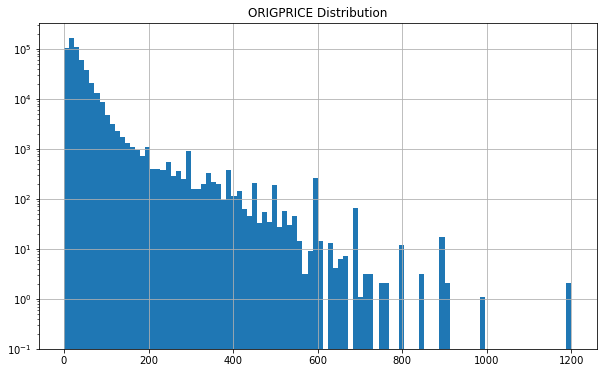

In [26]:
fig, ax = plt.subplots(figsize = (10,6))
df_origprice.hist(ax=ax, bins=100, bottom=0.1)
plt.title("ORIGPRICE Distribution")
ax.set_yscale('log')

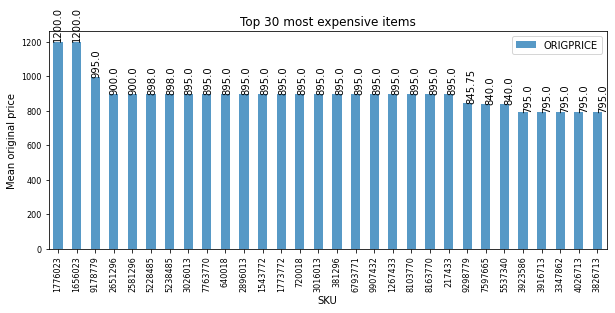

In [27]:
# Bar plot 
ax = df_origprice.head(30).plot(kind = 'bar', rot = 90, fontsize = 8, 
                             alpha = 0.75, figsize = (10,4))

# Customize plot
plt.title("Top 30 most expensive items")
plt.xlabel("SKU")
plt.ylabel("Mean original price")

# Add counts on top of bars

for i in ax.patches:
    ax.annotate(str(i.get_height()), 
               (i.get_x()*1.01, i.get_height()*1.01),
               rotation = 90)

# print plot
plt.show()

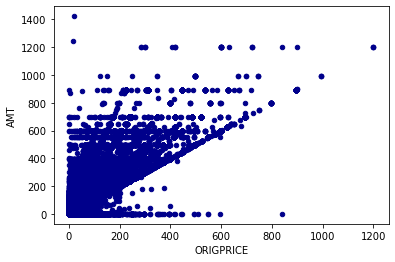

In [28]:
# Scatter ORIG PRICE VS AMT
ax = df.plot.scatter(x = "ORIGPRICE", y = "AMT", c = "DarkBlue")
plt.show()

"AMT" is supposed to be the total amount in a transaction and "ORIGPRICE" the original price of the item. Thus, we would expect that AMT>=ORIGPRICE, except maybe for any discount or promotions. Analyzing the scatterplot above we can confirm that, for most observtions, AMT is larger than ORIGPRICE. Additionally, there are several points in the 45° line, meaning that many transactions involve only one item. 

In [32]:
print("% transactions with more than article (AMT>ORIGPRICE): " + str(df[df["AMT"]>df["ORIGPRICE"]].shape[0]/df.shape[0]*100))
print("& transactions with ONE article (AMT=ORIGPRICE): " + str(df[df["AMT"]==df["ORIGPRICE"]].shape[0]/df.shape[0]*100))
print("% transactions with discount (AMT<ORIGPRICE): " + str(df[df["AMT"]<df["ORIGPRICE"]].shape[0]/df.shape[0]*100))

% transactions with more than article (AMT>ORIGPRICE): 52.46647
& transactions with ONE article (AMT=ORIGPRICE): 47.29555
% transactions with discount (AMT<ORIGPRICE): 0.23798
